# Calculating Median Pressures of Raman CO2 calibration analyses from ESI-TEC software log 
- This workbook shows how to extract and calculate median+standard deviation of pressure log data from the ESI-TEC software files corresponding to calibration analyses.
- This data is from Devitre et al. (2021), collected from acqusitions on a high pressure optical cell on the Cornell WITec Alpha300R. 

In [1]:
# Import useful python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math
import os
import datetime

## Downloading DiadFit locally
- The easiest way to install diad fit is by removing the #. It will install from PyPI
- You only need to do this once on each computer, or run in order to grab an updated version. 

### This imports DiadFit, and gives you the version. In all communication with Penny, make sure you say the version!


In [2]:
import DiadFit as pf
pf.__version__

'0.0.59'

## Extracting information from the ESI-TEC report files (.docx)
- ESI-Tec software exports a report in word document format, in which the absolute start time of the analysis,serial number of the sensor and other information are stored that we need to access

### First, we identify the report files

In [5]:
path=r"C:\Users\charl\Documents\Instruments and calibrations\UCB_6-8-23"
filetype_reports=['.docx']

report_files=pf.Psensor.get_files(path=path,filetype=filetype_reports)
display(report_files)

['UCB-060823.docx']

### The, we strip the start time of the analysis and the serial number of the sensor from the file

In [6]:
j=0
rep=report_files[j]

start_time,sn_str=pf.Psensor.report_info(path=path,report=rep)

2023-06-08 11:56:34
Serial No. 0141335


## Extracting pressure data from the ESI-TEC pressure log
- ESI-TEC software exports the full pressure log to either excel or csv, which we extract here

### First, we identify the data files 
- These could be excel or csv, we can load either

In [7]:
filetype=['.csv','.xlsx']

pfiles=pf.Psensor.get_files(path=path,filetype=filetype)
display(pfiles)

['Experiment_37C_6-8-23.xlsx', 'UCB-060823.csv', 'UCB-060823.xlsx']

### Now pick a file to start with and read in the data
- Here we will obtain a Date and Time column based on the report start time and a Timestamp column (UNIX time)

In [8]:
i=2 # select filenumber in pfiles
print(pfiles[i])

pdata=pf.Psensor.read_pfiles(path=path,file=pfiles[i],start_time=start_time,sn_name=sn_str)
display(pdata.head())

UCB-060823.xlsx


,Time_sincestart,Pressure / MPa,Temperature / °C,Date and Time,unix_timestamp
0,00:00:00.000000,7.015781,31.370117,2023-06-08 11:56:34.000000,1.686225e+09
1,00:00:02.999330,7.016101,31.372070,2023-06-08 11:56:36.999330,1.686225e+09
2,00:00:05.998141,7.016285,31.374023,2023-06-08 11:56:39.998141,1.686225e+09
3,00:00:08.999048,7.017104,31.377930,2023-06-08 11:56:42.999048,1.686225e+09
4,00:00:11.997376,7.018050,31.377930,2023-06-08 11:56:45.997376,1.686225e+09


### We can plot the pressure data with Date and Time 

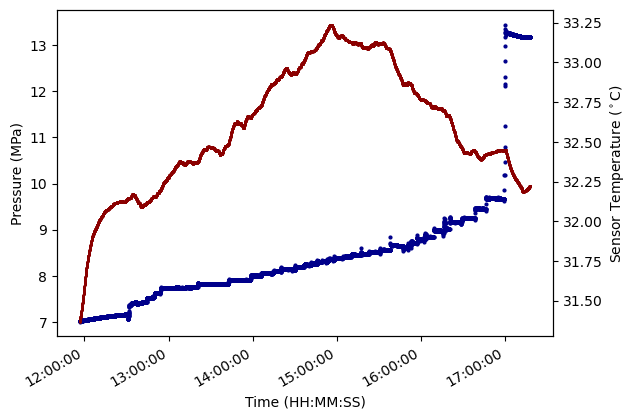

In [9]:
fig, ax = plt.subplots()

ax.plot_date(pdata['Date and Time'],pdata['Pressure / MPa'],'o',markersize=2,color='darkblue',zorder=0)
ax2=ax.twinx()
ax2.plot_date(pdata['Date and Time'],pdata['Temperature / °C'],'o',markersize=1,color='darkred',zorder=0)

ax.set_xlabel(r"Time (HH:MM:SS)")
ax.set_ylabel(r"Pressure (MPa)")
ax2.set_ylabel(r"Sensor Temperature ($^\circ$C)")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gcf().autofmt_xdate()

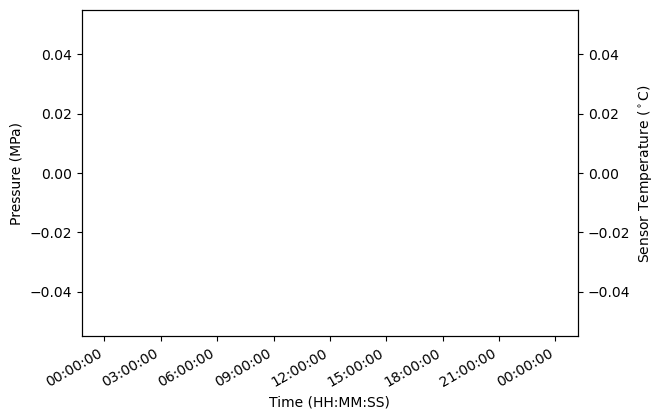

In [10]:
filter=(pdata['Pressure / MPa']<6.7)&(pdata['Pressure / MPa']>6.5)&(pdata['unix_timestamp']>1681175869)
pdata[filter]
fig, ax = plt.subplots()

ax.plot_date(pdata['Date and Time'][filter],pdata['Pressure / MPa'][filter],'o',markersize=2,color='darkblue',zorder=0)
ax2=ax.twinx()
ax2.plot_date(pdata['Date and Time'][filter],pdata['Temperature / °C'][filter],'o',markersize=1,color='darkred',zorder=0)

ax.set_xlabel(r"Time (HH:MM:SS)")
ax.set_ylabel(r"Pressure (MPa)")
ax2.set_ylabel(r"Sensor Temperature ($^\circ$C)")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gcf().autofmt_xdate()

In [11]:
cu_test=pd.read_excel(r"C:\Users\charl\Documents\Instruments and calibrations\FDCA_calibfiles_CORNELL\112820_sensorout.xlsx", sheet_name='Sensor 0830903')
cu_test

,Time,Pressure / MPa,Temperature / °C
0,0.578044,0.101868,20.957031
1,0.578056,0.101962,20.955078
2,0.578067,0.101679,20.955078
3,0.578079,0.101444,20.958008
4,0.578090,0.101208,20.956055
...,...,...,...
42012,1.064281,0.084286,31.304688
42013,1.064293,0.084333,31.303711
42014,1.064304,0.083060,31.301758
42015,1.064316,0.083956,31.303711


Text(0, 0.5, 'Sensor Temperature ($^\\circ$C)')

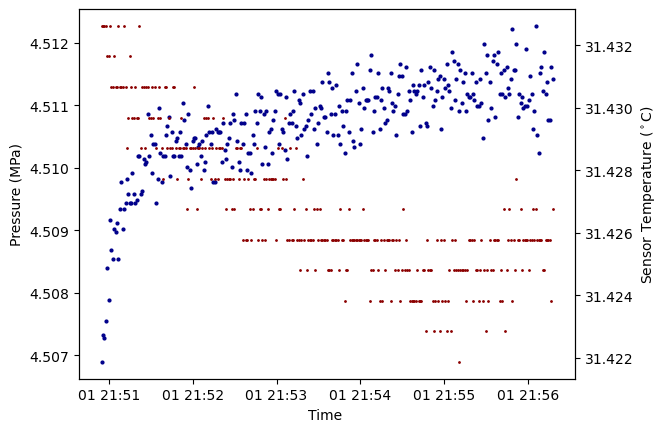

In [12]:
filter=(cu_test['Pressure / MPa']<5)&(cu_test['Pressure / MPa']>4)&(cu_test['Time']>0.91035)&(cu_test['Time']<0.9141)

fig, ax = plt.subplots()

ax.plot_date(cu_test['Time'][filter],cu_test['Pressure / MPa'][filter],'o',markersize=2,color='darkblue',zorder=0)
ax2=ax.twinx()
ax2.plot_date(cu_test['Time'][filter],cu_test['Temperature / °C'][filter],'o',markersize=1,color='darkred',zorder=0)

ax.set_xlabel(r"Time ")
ax.set_ylabel(r"Pressure (MPa)")
ax2.set_ylabel(r"Sensor Temperature ($^\circ$C)")


## Now read in the calibration analysis data 
- This is output xlsx by "Stitch_Outputs_Together.pynb" using DiadFit. 
- You could also simply use a metadata table, but it must have the correct format as output by DiadFit metadata loop functions.

In [13]:
sdata_base = pd.read_excel(r"C:\Users\charl\Documents\Instruments and calibrations\OUTPUT\UCB_6-8-23_FI_fitting_w_sec_phases.xlsx")
sdata_base=sdata_base.drop(columns={'Unnamed: 0','Unnamed: 0.1'}) # drop unnamed column
display(sdata_base.head())

,Corrected_Splitting,Corr_Split+1σ,Corr_Split-1σ,Corr_Split_1σ_val,filename_x,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,103.298551,103.303940,103.293162,0.005389,06 FDCA-P60-1_CRR_DiadFit,103.548947,0.006325,0.005347,1285.110681,0.005234,...,June,8,34.482,10,5,5,"['0h', '0m', '52s']",12:27:29 PM\n,44849,1325.004
1,103.302037,103.307423,103.296651,0.005386,07 FDCA-P60-2,103.552475,0.006376,0.005343,1285.106366,0.005216,...,June,8,34.474,10,5,5,"['0h', '0m', '51s']",12:28:33 PM\n,44913,1325.004
2,103.303029,103.308260,103.297797,0.005231,08 FDCA-P60-3,103.553497,0.006165,0.005187,1285.105751,0.005070,...,June,8,34.470,10,5,5,"['0h', '0m', '51s']",12:29:25 PM\n,44965,1325.004
3,103.360624,103.363757,103.357491,0.003133,10 FDCA-P59-1,103.611642,0.004099,0.003045,1284.961979,0.002709,...,June,8,34.560,10,5,5,"['0h', '0m', '51s']",12:42:31 PM\n,45751,1325.004
4,103.379783,103.382467,103.377099,0.002684,11 FDCA-P58-1,103.631029,0.003250,0.002579,1284.916416,0.002452,...,June,8,34.491,10,5,5,"['0h', '0m', '51s']",12:48:30 PM\n,46110,1325.004


# Calculate the datetime, unix timestamp and duration of each analysis
- Here we can specify a time offset between the raman computer and the pressure recording computer
- For this dataset, the raman computer was about ~4 minutes ahead of the pressure recording computer. If we specify df=sdata,raman_cpu_offset='ahead',offset_hms=[0,5,0] as arguments of the function, we will immediately at the end that the standard deviations of the pressure medians are much lower. If instead we said raman_cpu_offset='none', we can see at the end that the standard deviations are large for some samples.

In [14]:
sdata=pf.Psensor.add_datetime_and_duration_cols(df=sdata_base,raman_cpu_offset='ahead',offset_hms=[0,0,0])
sdata.head()

,Corrected_Splitting,Corr_Split+1σ,Corr_Split-1σ,Corr_Split_1σ_val,filename_x,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,...,accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,Date and Time,Date and Time - offset,unix_timestamp,duration_s
0,103.298551,103.303940,103.293162,0.005389,06 FDCA-P60-1_CRR_DiadFit,103.548947,0.006325,0.005347,1285.110681,0.005234,...,5,5,"['0h', '0m', '52s']",12:27:29 PM,44849,1325.004,2023-06-08 12:27:29,2023-06-08 12:27:29,1.686227e+09,52.0
1,103.302037,103.307423,103.296651,0.005386,07 FDCA-P60-2,103.552475,0.006376,0.005343,1285.106366,0.005216,...,5,5,"['0h', '0m', '51s']",12:28:33 PM,44913,1325.004,2023-06-08 12:28:33,2023-06-08 12:28:33,1.686227e+09,51.0
2,103.303029,103.308260,103.297797,0.005231,08 FDCA-P60-3,103.553497,0.006165,0.005187,1285.105751,0.005070,...,5,5,"['0h', '0m', '51s']",12:29:25 PM,44965,1325.004,2023-06-08 12:29:25,2023-06-08 12:29:25,1.686227e+09,51.0
3,103.360624,103.363757,103.357491,0.003133,10 FDCA-P59-1,103.611642,0.004099,0.003045,1284.961979,0.002709,...,5,5,"['0h', '0m', '51s']",12:42:31 PM,45751,1325.004,2023-06-08 12:42:31,2023-06-08 12:42:31,1.686228e+09,51.0
4,103.379783,103.382467,103.377099,0.002684,11 FDCA-P58-1,103.631029,0.003250,0.002579,1284.916416,0.002452,...,5,5,"['0h', '0m', '51s']",12:48:30 PM,46110,1325.004,2023-06-08 12:48:30,2023-06-08 12:48:30,1.686229e+09,51.0


# Calculate the median pressure and median absolute deviation for each analysis
- This portion calculates the median pressures for each analysis based on the timestamps, and then merges the results back in with the analysis dataset
- Make sure that the time on each acquisition computer is the same or if you know the offset correct the time in one of the datasets

## Calculate median pressure and median absolute deviation for each analysis

In [15]:
# Calculate median pressure intra-analysis and 1 median absolute deviation
p_medians=pf.Psensor.get_p_medians(pdata=pdata,sdata=sdata)
display(p_medians.head())

,filename_x,start_time_P,end_time_P,median_pressure,mad_pressure,median_temp,mad_temp
0,06 FDCA-P60-1_CRR_DiadFit,2023-06-08 12:27:28.025409024,2023-06-08 12:28:20.025409024,7.163984,0.000772,32.123047,0.001447
1,07 FDCA-P60-2,2023-06-08 12:28:34.029661952,2023-06-08 12:29:25.029661952,7.167908,0.000840,32.125000,0.001804
2,08 FDCA-P60-3,2023-06-08 12:29:25.031243008,2023-06-08 12:30:16.031243008,7.170808,0.000655,32.134277,0.002484
3,10 FDCA-P59-1,2023-06-08 12:42:31.022685952,2023-06-08 12:43:22.022685952,7.433209,0.001135,32.104492,0.001043
4,11 FDCA-P58-1,2023-06-08 12:48:31.070110976,2023-06-08 12:49:22.070110976,7.535690,0.000389,32.155273,0.001690


## Merge results into analysis dataset and plot
- Here, check that the standard deviations are small, plot can help ID issues like mismatching computer time
- In this dataset, for instance, the CPU time on the computer where the Raman analyses were made and the pressure recording laptop was slightly different (by 4 minutes), in a case like this, you'll want to adjust the time of the analyses, you can go back and do this then recalculate the medians.

,Corrected_Splitting,Corr_Split+1σ,Corr_Split-1σ,Corr_Split_1σ_val,filename_x,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,...,Date and Time,Date and Time - offset,unix_timestamp,duration_s,start_time_P,end_time_P,median_pressure,mad_pressure,median_temp,mad_temp
0,103.298551,103.303940,103.293162,0.005389,06 FDCA-P60-1_CRR_DiadFit,103.548947,0.006325,0.005347,1285.110681,0.005234,...,2023-06-08 12:27:29,2023-06-08 12:27:29,1.686227e+09,52.0,2023-06-08 12:27:28.025409024,2023-06-08 12:28:20.025409024,7.163984,0.000772,32.123047,0.001447
1,103.302037,103.307423,103.296651,0.005386,07 FDCA-P60-2,103.552475,0.006376,0.005343,1285.106366,0.005216,...,2023-06-08 12:28:33,2023-06-08 12:28:33,1.686227e+09,51.0,2023-06-08 12:28:34.029661952,2023-06-08 12:29:25.029661952,7.167908,0.000840,32.125000,0.001804
2,103.303029,103.308260,103.297797,0.005231,08 FDCA-P60-3,103.553497,0.006165,0.005187,1285.105751,0.005070,...,2023-06-08 12:29:25,2023-06-08 12:29:25,1.686227e+09,51.0,2023-06-08 12:29:25.031243008,2023-06-08 12:30:16.031243008,7.170808,0.000655,32.134277,0.002484
3,103.360624,103.363757,103.357491,0.003133,10 FDCA-P59-1,103.611642,0.004099,0.003045,1284.961979,0.002709,...,2023-06-08 12:42:31,2023-06-08 12:42:31,1.686228e+09,51.0,2023-06-08 12:42:31.022685952,2023-06-08 12:43:22.022685952,7.433209,0.001135,32.104492,0.001043
4,103.379783,103.382467,103.377099,0.002684,11 FDCA-P58-1,103.631029,0.003250,0.002579,1284.916416,0.002452,...,2023-06-08 12:48:30,2023-06-08 12:48:30,1.686229e+09,51.0,2023-06-08 12:48:31.070110976,2023-06-08 12:49:22.070110976,7.535690,0.000389,32.155273,0.001690


(19516.47741898148, 19516.727534722224)

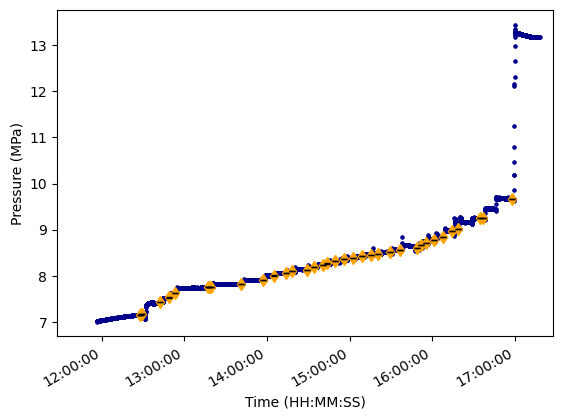

In [16]:
# Merge this into the OG spectal dataframe
merged_data=pd.merge(left=sdata,right=p_medians,how='outer',left_on='filename_x',right_on='filename_x')
# sort the dataframe by date and time
merged_data.sort_values(by='Date and Time',inplace=True)

display(merged_data.head())

show_temp=False # If you want to show the sensor temperature averages as well, change to True

fig, ax = plt.subplots()

ax.plot_date(pdata['Date and Time'],pdata['Pressure / MPa'],'o',markersize=2,color='darkblue',zorder=1)

ax.plot_date(pdata['Date and Time'],pdata['Pressure / MPa'],'o',markersize=2,color='darkblue',zorder=1)
ax.errorbar(merged_data['Date and Time - offset'],merged_data['median_pressure'], yerr=merged_data['mad_pressure'], fmt='d',color='orange',mfc='orange', ecolor='black', capsize=2,barsabove=True,zorder=2)

if show_temp==True:
    
    ax2=ax.twinx()

    ax2.plot_date(pdata['Date and Time'],pdata['Temperature / °C'],'o',markersize=1,color='darkred',zorder=-1)
    ax2.errorbar(merged_data['Date and Time - offset'],merged_data['median_temp'], yerr=merged_data['mad_temp'], fmt='s',color='orange',mfc='orange', ecolor='black', capsize=2,barsabove=True,zorder=0)
    ax2.set_ylabel(r"Sensor Temperature ($^\circ$C)")

ax.set_xlabel(r"Time (HH:MM:SS)")
ax.set_ylabel(r"Pressure (MPa)")

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gcf().autofmt_xdate()
plt.xlim(min(merged_data['Date and Time - offset'])-datetime.timedelta(hours=1),max(merged_data['Date and Time - offset'])+datetime.timedelta(hours=0.5))


## Export merged data to excel or clipboard

In [17]:
merged_data['filename_nocrr'] = merged_data['filename_x'].str.split('_', n=1).str[0]
#Export the updated dataframe to excel
merged_data.to_excel(path+'/'+'merged_dataframe.xlsx')
#Export the updated dataframe to clipboard
merged_data.to_clipboard(excel=True)

## FERMI SPLIT vs P

In [18]:
#creates a column with a new column that splits the filename to sample name (FDCA-P1-1 becomes FDCA-P1)
df=merged_data.copy()
df['filename_split'] = df['filename_x'].str.split('-', n=2).str[:2].str.join('-')
df.head()

,Corrected_Splitting,Corr_Split+1σ,Corr_Split-1σ,Corr_Split_1σ_val,filename_x,Splitting,Split_err_abs,Split_err_quadrature,Diad1_Combofit_Cent,Diad1_cent_err,...,unix_timestamp,duration_s,start_time_P,end_time_P,median_pressure,mad_pressure,median_temp,mad_temp,filename_nocrr,filename_split
0,103.298551,103.303940,103.293162,0.005389,06 FDCA-P60-1_CRR_DiadFit,103.548947,0.006325,0.005347,1285.110681,0.005234,...,1.686227e+09,52.0,2023-06-08 12:27:28.025409024,2023-06-08 12:28:20.025409024,7.163984,0.000772,32.123047,0.001447,06 FDCA-P60-1,06 FDCA-P60
1,103.302037,103.307423,103.296651,0.005386,07 FDCA-P60-2,103.552475,0.006376,0.005343,1285.106366,0.005216,...,1.686227e+09,51.0,2023-06-08 12:28:34.029661952,2023-06-08 12:29:25.029661952,7.167908,0.000840,32.125000,0.001804,07 FDCA-P60-2,07 FDCA-P60
2,103.303029,103.308260,103.297797,0.005231,08 FDCA-P60-3,103.553497,0.006165,0.005187,1285.105751,0.005070,...,1.686227e+09,51.0,2023-06-08 12:29:25.031243008,2023-06-08 12:30:16.031243008,7.170808,0.000655,32.134277,0.002484,08 FDCA-P60-3,08 FDCA-P60
3,103.360624,103.363757,103.357491,0.003133,10 FDCA-P59-1,103.611642,0.004099,0.003045,1284.961979,0.002709,...,1.686228e+09,51.0,2023-06-08 12:42:31.022685952,2023-06-08 12:43:22.022685952,7.433209,0.001135,32.104492,0.001043,10 FDCA-P59-1,10 FDCA-P59
4,103.379783,103.382467,103.377099,0.002684,11 FDCA-P58-1,103.631029,0.003250,0.002579,1284.916416,0.002452,...,1.686229e+09,51.0,2023-06-08 12:48:31.070110976,2023-06-08 12:49:22.070110976,7.535690,0.000389,32.155273,0.001690,11 FDCA-P58-1,11 FDCA-P58


<ErrorbarContainer object of 3 artists>

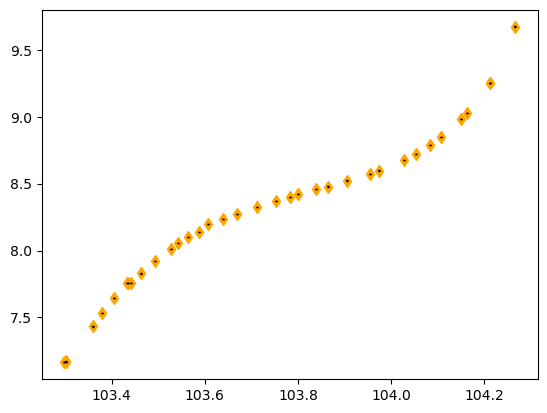

In [19]:
plt.errorbar(y=merged_data['median_pressure'],x=merged_data['Corrected_Splitting'], yerr=merged_data['mad_pressure'], fmt='d',color='orange',mfc='orange', ecolor='black', capsize=1,barsabove=True,zorder=2)
